# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 500) 

# Dataset

In [2]:
df = pd.read_csv('./xapi.csv')
df

,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# Exploration and Visualization

## Data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   Nationality               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisitedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

## Missing Values

In [4]:
print(df.isnull().sum())

gender                      0
Nationality                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisitedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [5]:
df['Class'].unique()

array(['M', 'L', 'H'], dtype=object)

## Distributions

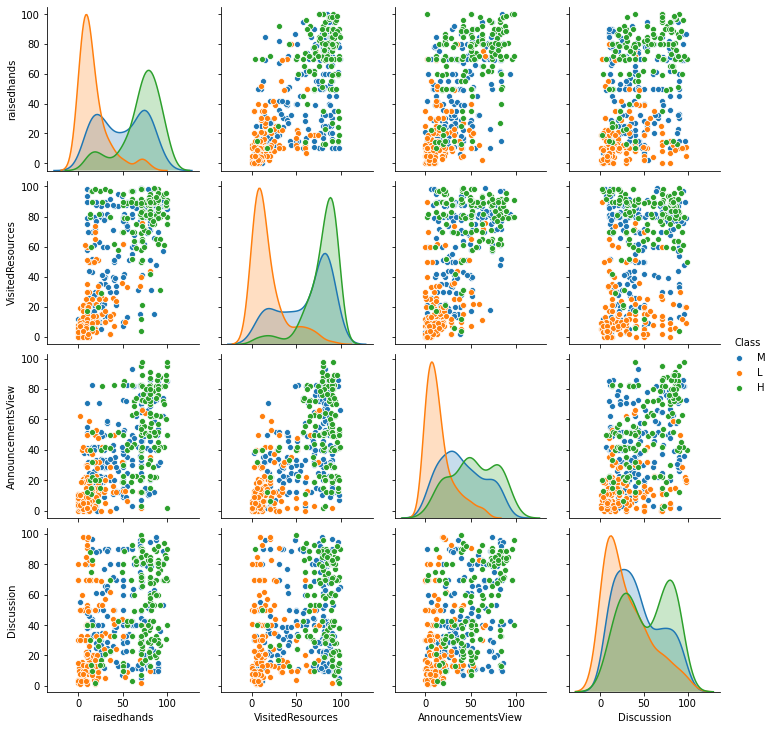

In [6]:
sns.pairplot(df, hue='Class')

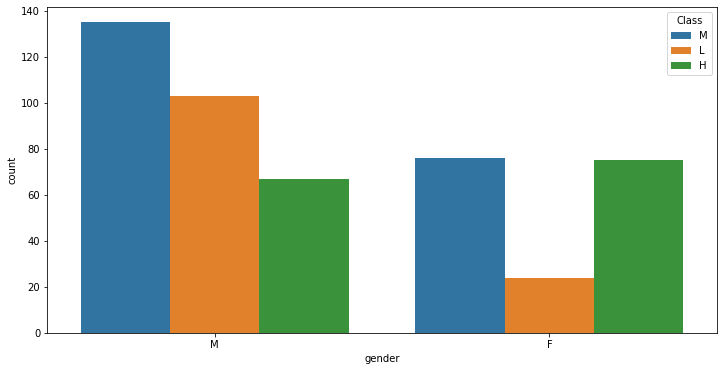

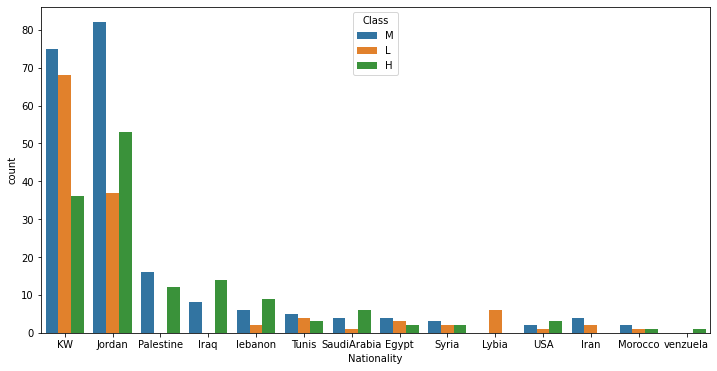

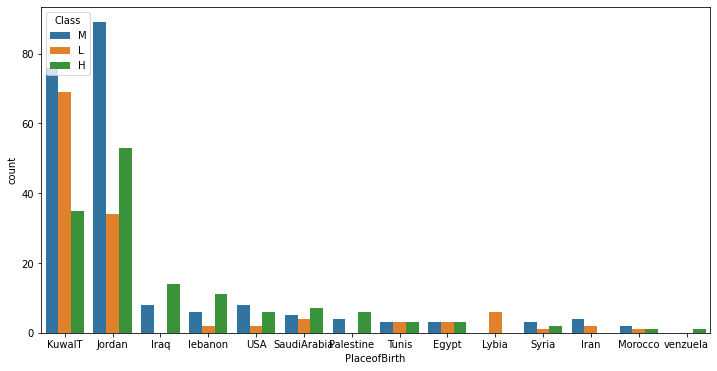

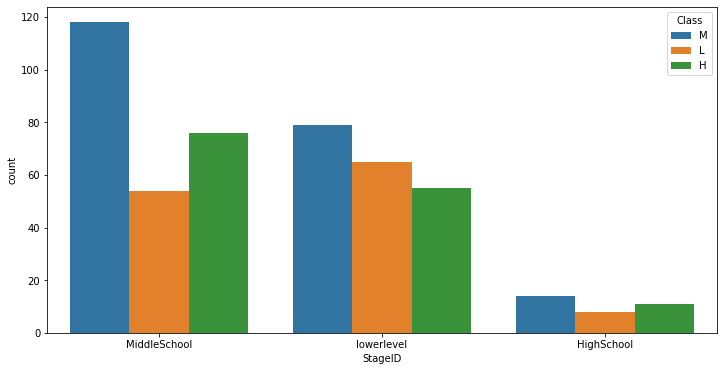

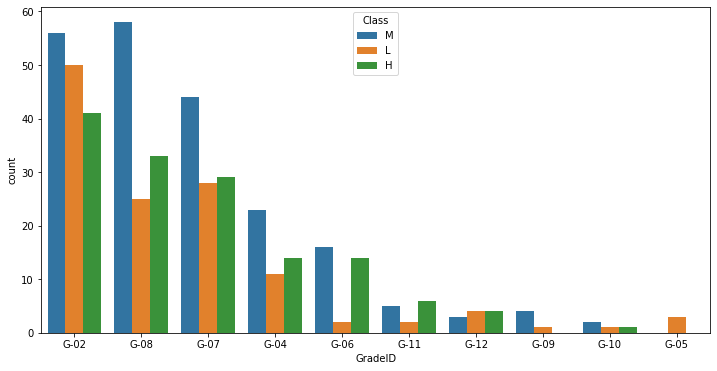

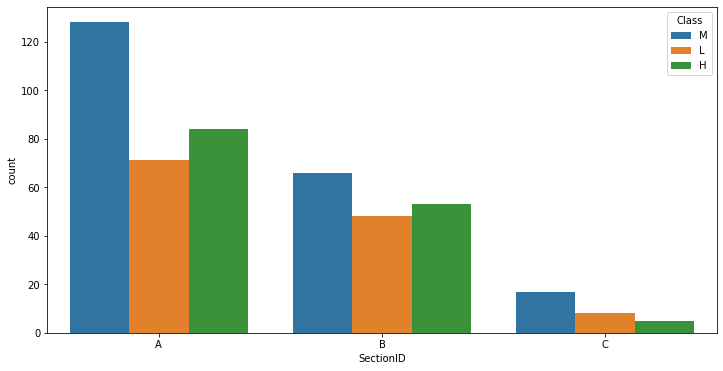

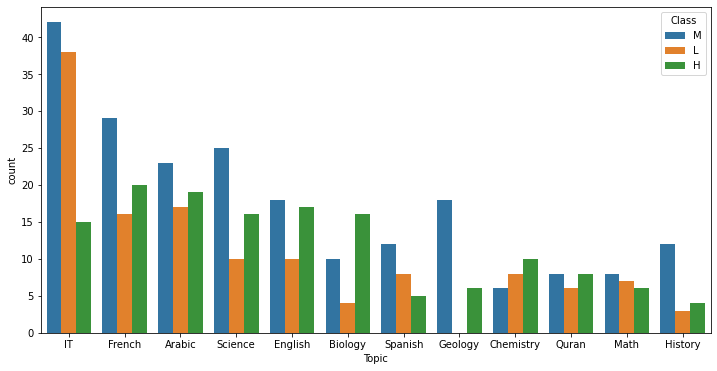

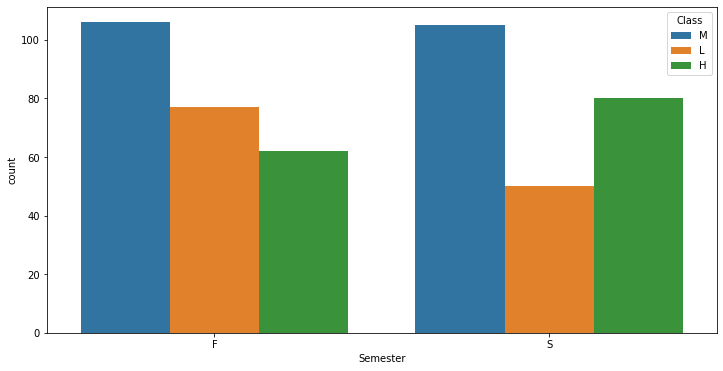

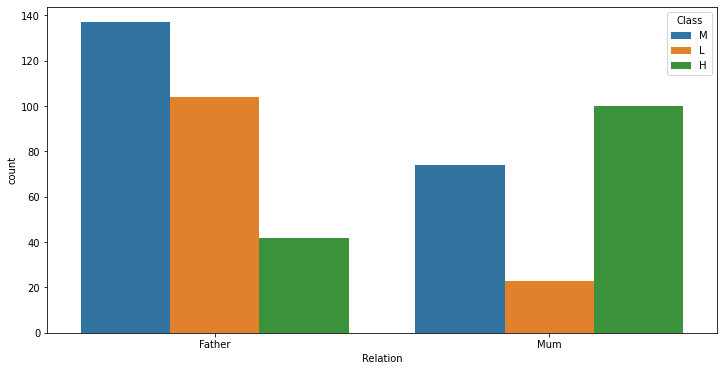

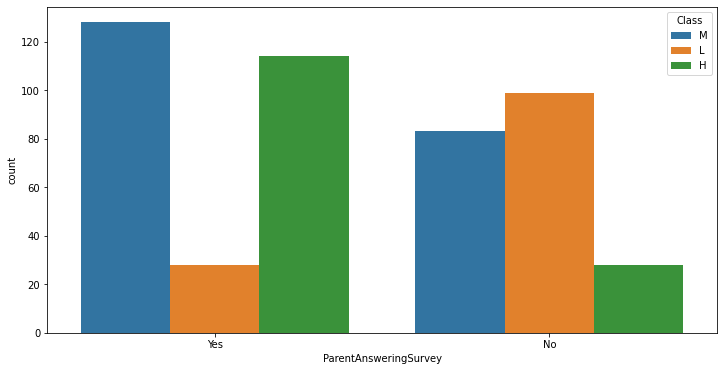

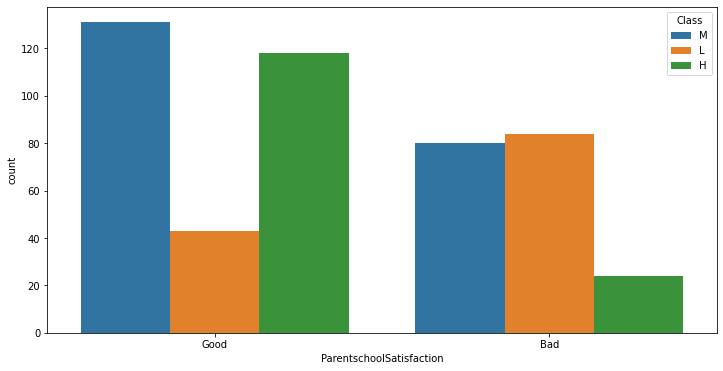

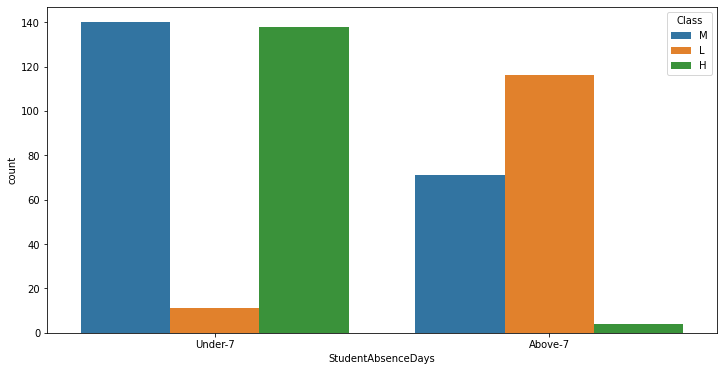

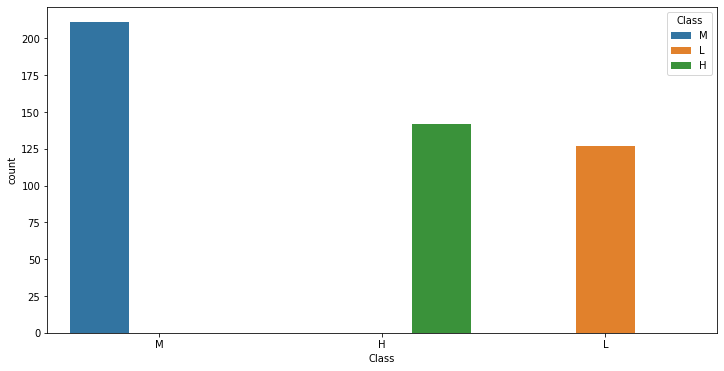

In [7]:
for col in df.columns:
    if df[col].dtype == np.object:
        descending_order = df[col].value_counts().sort_values(ascending=False).index
        plt.figure(figsize=(12,6))
        sns.countplot(data=df,x=df[col], hue="Class", order=descending_order)
        plt.show()

## Encoding

Notice that most values are not numeric.
However, they can be encoded in a more informative way than dummy encoding.

In [8]:
old_df = df.copy()

In [9]:
df['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

In [10]:
df = old_df.copy()

df['Class'] = df['Class'].map({'L':0, 'M':1, 'H': 2})
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
# df['Nationality'] = df['Nationality'].map()
df['StageID'] = df['StageID'].map({'lowerlevel': 0, 'MiddleSchool': 1, 'HighSchool': 2})
df['GradeID'] = df['GradeID'].map(lambda x: int(x.replace('G-', '')))
df['Semester'] = df['Semester'].map({'F': 1, 'S': 2})
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].map({'Yes': 1, 'No': 0})
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].map({'Good': 1, 'Bad': 0})
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].map({'Under-7': 0, 'Above-7': 1})
df['Relation'] = df['Relation'].map({'Father': 0, 'Mum': 1})

df.drop(['Nationality', 'PlaceofBirth', 'SectionID', 'Topic'], axis=1, inplace=True)
# df = pd.get_dummies(df)
df

,gender,StageID,GradeID,Semester,Relation,raisedhands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,0,4,1,0,15,16,2,20,1,1,0,1
1,0,0,4,1,0,20,20,3,25,1,1,0,1
2,0,0,4,1,0,10,7,0,30,0,0,1,0
3,0,0,4,1,0,30,25,5,35,0,0,1,0
4,0,0,4,1,0,40,50,12,50,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,1,8,2,0,5,4,5,8,0,0,1,0
476,1,1,8,1,0,50,77,14,28,0,0,0,1
477,1,1,8,2,0,55,74,25,29,0,0,0,1
478,1,1,8,1,0,30,17,14,57,0,0,1,0


In [11]:
dict(df['ParentschoolSatisfaction'].value_counts()/len(df))

{1: 0.6083333333333333, 0: 0.39166666666666666}

## Feature Correlation Heatmap

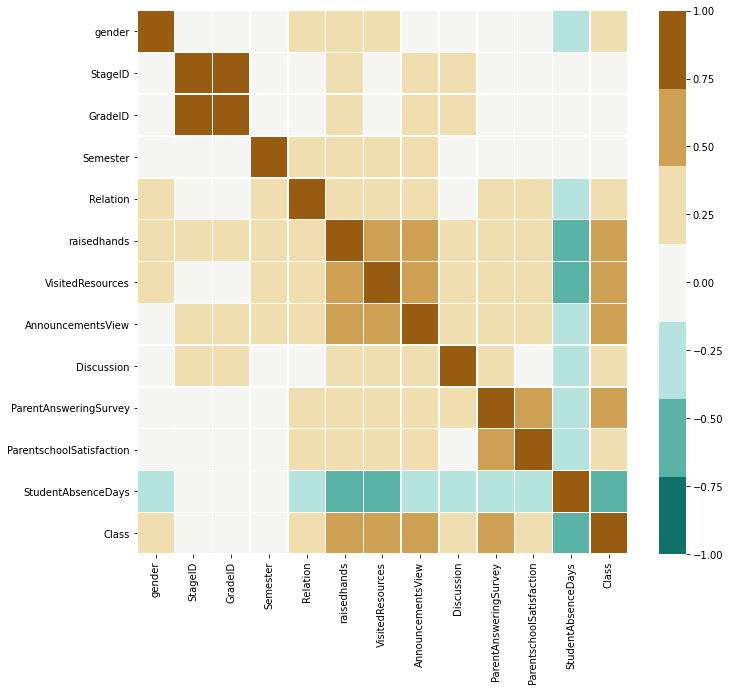

In [12]:
f, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(pd.get_dummies(df).corr(), fmt="f", cmap=sns.color_palette("BrBG_r", 7), linewidths=.5, ax=ax, vmin=-1, vmax=1)

In [13]:
# sns.pairplot(df, hue='Class')

# Baseline Results

## Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# restore dataset to before visualization
# df = old_df.copy()

# separate features from label
X = df.drop('Class', axis=1)
y = df['Class']

# convert class to numeric for prediction
# y = y.map({'Best': 5, 'Vg': 4, 'Good': 3, 'Pass': 2, 'Fail': 1})

X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=df.drop('Class', axis=1).columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Training:', X_train.shape, 'Testing:',  X_test.shape)
y

Training: (336, 12) Testing: (144, 12)


0      1
1      1
2      0
3      0
4      1
      ..
475    0
476    1
477    1
478    0
479    0
Name: Class, Length: 480, dtype: int64

## Classification

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


algorithms = {
    'NB': GaussianNB(),
    'LR': LogisticRegression(),
    'DT': DecisionTreeClassifier(max_depth=4),
    'RF': RandomForestClassifier(),
    'AB': AdaBoostClassifier(n_estimators=200)
}

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

average_scores_split = {}
algorithms_copy = dict(algorithms)
for name, algo in algorithms_copy.items():
    print(algo, '\n\n\n')
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    print(confusion_matrix(y_test, y_pred), '\n\n\n')
    print(classification_report(y_test, y_pred), '\n\n\n')
    res = classification_report(y_test, y_pred, output_dict=True)
    average_scores_split[name] = {'accuracy': res['accuracy'], 'precision': res['macro avg']['precision'], 'recall': res['macro avg']['recall'], 'f1-score': res['macro avg']['f1-score']}
split_avg_scores = pd.DataFrame(average_scores_split).transpose()

GaussianNB(priors=None, var_smoothing=1e-09) 



[[32  6  1]
 [ 8 39 14]
 [ 0  7 37]] 



              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.75      0.64      0.69        61
           2       0.71      0.84      0.77        44

    accuracy                           0.75       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.75      0.75      0.75       144
 



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



[[31  8  0]
 [10 46  5]
 [ 0 13 31]] 



              precision    recall  f1-score   support

           0       0.76      0.79      0.77        39
           1       0.69      0.75      0.72  

## Visualization

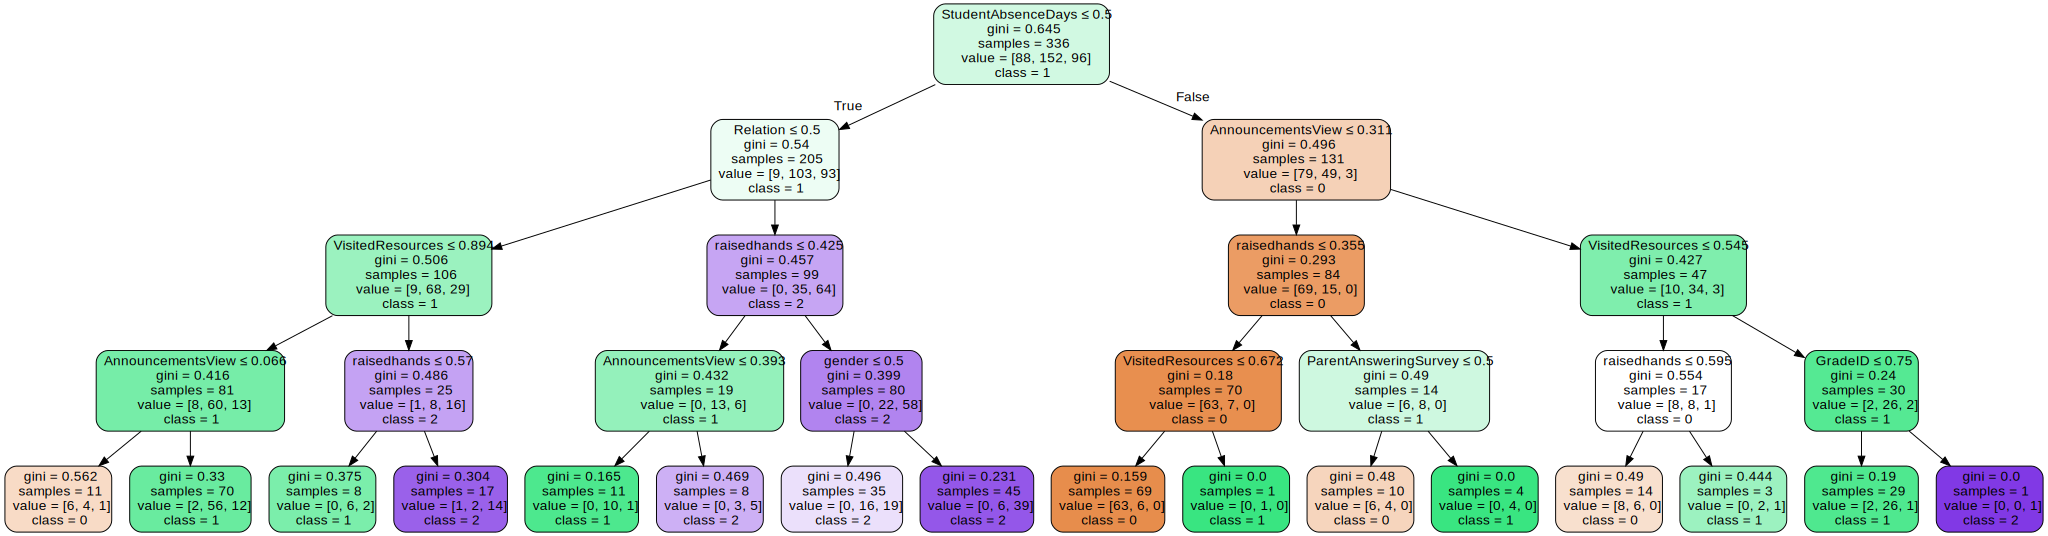

In [80]:
import graphviz
from sklearn import tree

with open('tree.png', 'w', encoding='utf-8') as f:
    dot_data = tree.export_graphviz(algorithms_copy['DT'], out_file=None,
        feature_names=X.columns,
        class_names=['0','1','2'],
        filled=True, rounded=True,
        special_characters=True, 
        rotate=False
    )
    f.write(dot_data)
#     print(dot_data)
graph = graphviz.Source(dot_data)
graph


## 10-fold Cross Validation

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer

scorers = {
    **{'precision_' + str(i): make_scorer(precision_score, average = None, labels = [i], zero_division=0) for i in range(3)},
    'precision_average': make_scorer(precision_score, average='macro', zero_division=0),
    **{'recall_' + str(i): make_scorer(recall_score, average = None, labels = [i], zero_division=0) for i in range(3)},
    'recall_average': make_scorer(recall_score, average='macro', zero_division=0),
    **{'f1_score_' + str(i): make_scorer(f1_score, average = None, labels = [i], zero_division=0) for i in range(3)},
    'f1_average': make_scorer(f1_score, average='macro'),
    'accuracy': make_scorer(accuracy_score)
}

average_scores = {}
for name, algo in dict(algorithms).items():
    res = cross_validate(algo, X, y, cv=10, scoring=scorers, n_jobs=-1)
    res = {k: v.mean() for k, v in res.items()}
    labels = list(range(3))
    res_df_dict = {'label': labels, 'precision': [res['test_precision_' + str(i)] for i in labels], 'recall': [res['test_recall_' + str(i)] for i in labels], 'f1_score': [res['test_f1_score_' + str(i)] for i in labels]}
    res_df = pd.DataFrame(res_df_dict)
    print('\n\n', algo, '\n\n')
    print(res_df)
    print('\nAccuracy:', res['test_accuracy'])
    print('Average Precision:', res['test_precision_average'])
    print('Average Recall:', res['test_recall_average'])
    print('Average F1-scoree:', res['test_f1_average'])
    average_scores['CV_' + name] = {'accuracy': res['test_accuracy'], 'precision': res['test_precision_average'], 'recall': res['test_recall_average'], 'f1-score': res['test_f1_average']}
cv_avg_scores = pd.DataFrame(average_scores).transpose()



 GaussianNB(priors=None, var_smoothing=1e-09) 


   label  precision    recall  f1_score
0      0   0.820256  0.858974  0.829815
1      1   0.749608  0.597403  0.659129
2      2   0.664942  0.794762  0.717230

Accuracy: 0.725
Average Precision: 0.74493518017108
Average Recall: 0.7503796203796205
Average F1-scoree: 0.7353912195675858


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 


   label  precision    recall  f1_score
0      0   0.861235  0.858974  0.851125
1      1   0.718396  0.730087  0.720946
2      2   0.745070  0.689524  0.706092

Accuracy: 0.7520833333333333
Average Precision: 0.7749000848366174
Average Recall: 0.7595282495282495
Average F1-scoree: 0.7593877745313632


 DecisionTreeClassifier(ccp_

## Comparison

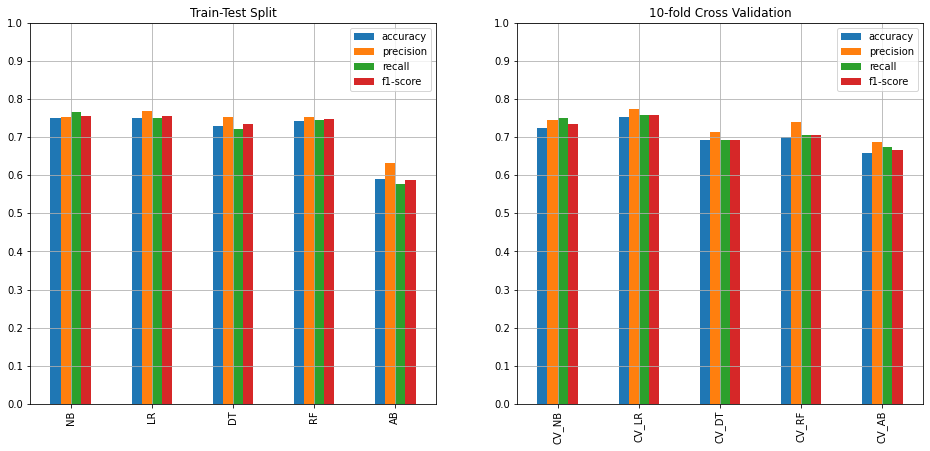

In [30]:
f, ax = plt.subplots(1,2, figsize=(16, 7))
combined_scores = split_avg_scores.append(cv_avg_scores)
plt.setp(ax, ylim=(0,1), yticks=[i/10 for i in range(11)])

split_avg_scores.plot(ax=ax[0], kind='bar', grid=True, title='Train-Test Split')
cv_avg_scores.plot(ax=ax[1], kind='bar', grid=True, title='10-fold Cross Validation')

In [20]:
split_avg_scores

,accuracy,precision,recall,f1-score
NB,0.750000,0.753846,0.766922,0.757075
LR,0.750000,0.767925,0.751172,0.756250
DT,0.729167,0.754228,0.722448,0.734197
RF,0.743056,0.754090,0.744736,0.748816
AB,0.590278,0.631587,0.578407,0.586525


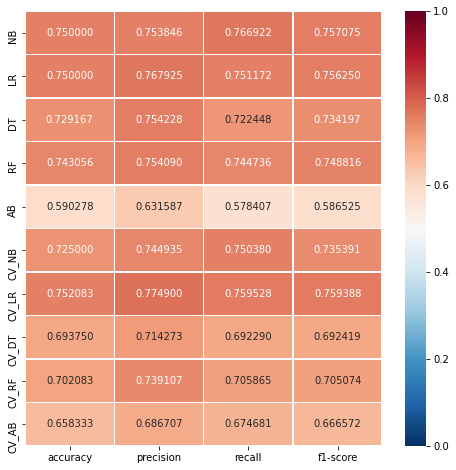

In [21]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(combined_scores, fmt="f", cmap='RdBu_r', linewidths=.5, ax=ax, vmin=0, vmax=1, annot=True)

# Feature Selection

## Feature Importance - RandomForest

<BarContainer object of 12 artists>

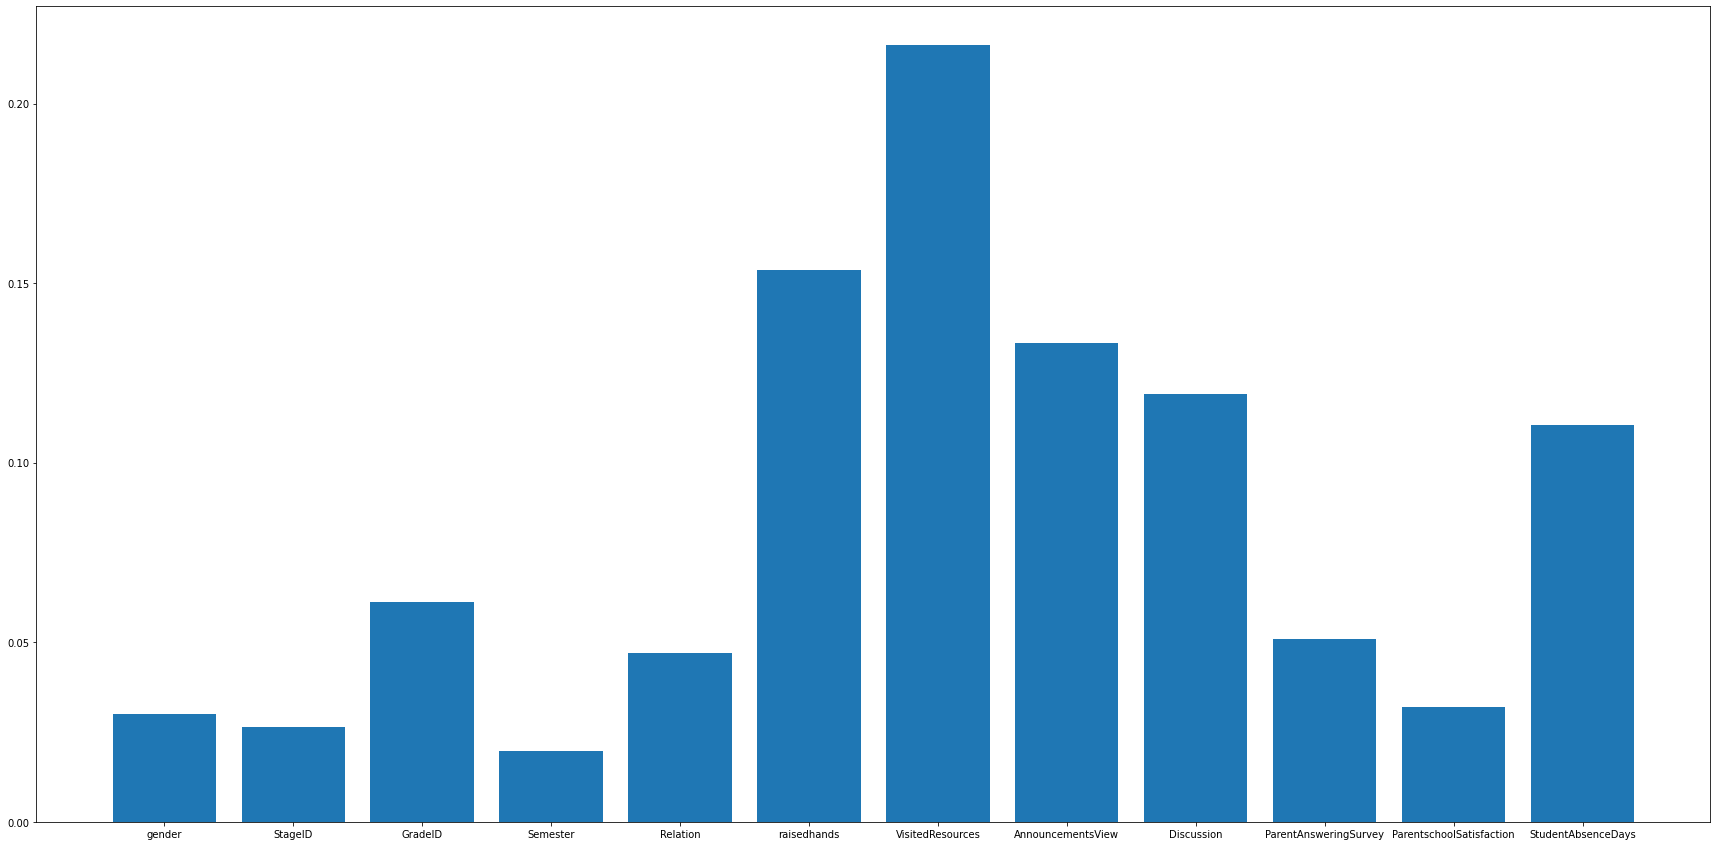

In [31]:
plt.figure(figsize=(30,15))
importances = algorithms_copy['RF'].feature_importances_
plt.bar([x for x in range(len(importances))], importances, tick_label=X.columns)

## Feature Importance - DecisionTree

<BarContainer object of 12 artists>

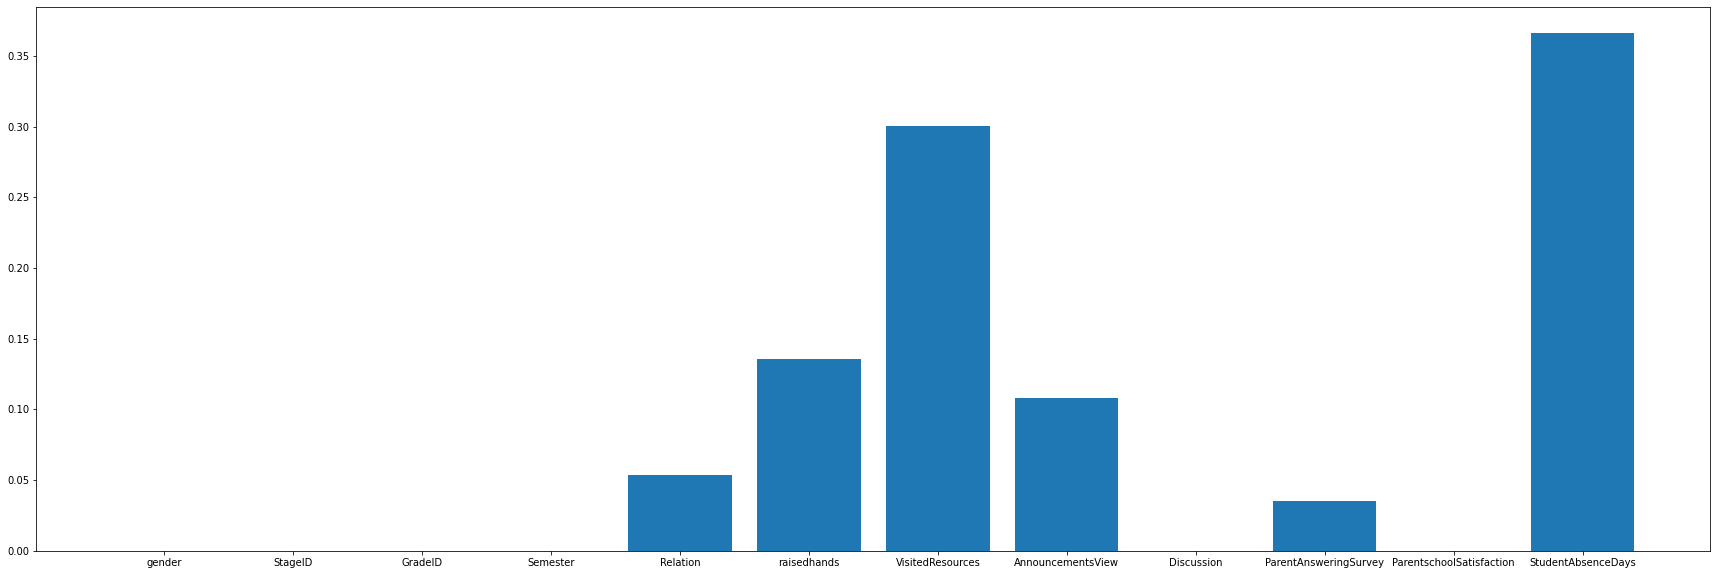

In [23]:
plt.figure(figsize=(30,15))
importances = algorithms_copy['DT'].feature_importances_
plt.bar([x for x in range(len(importances))], importances, tick_label=X.columns)

## Performance when selecting top _k_ features

In [24]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

fs_scores_split = {}


for k in range(1, X.shape[1]+2, 2):
    algorithms_copy = dict(algorithms)
#     print(f'{k=} {X.shape[1]=}')
    X_new = SelectKBest(mutual_info_classif, k=min(k, X.shape[1])).fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)
    for name, algo in algorithms_copy.items():
#         print(algo, '\n\n\n')
#         print(X_train.shape)
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
#         print(confusion_matrix(y_test, y_pred), '\n\n\n')
#         print(classification_report(y_test, y_pred), '\n\n\n')
        res = classification_report(y_test, y_pred, output_dict=True)
        fs_scores_split[f'FS_{min(k, X.shape[1])}_{name}'] = {'k-features': min(k, X.shape[1]), 'accuracy': res['accuracy'], 'precision': res['macro avg']['precision'], 'recall': res['macro avg']['recall'], 'f1-score': res['macro avg']['f1-score']}
fs = pd.DataFrame(fs_scores_split).transpose()

In [25]:
fs = fs.transpose()
fs

,FS_1_NB,FS_1_LR,FS_1_DT,FS_1_RF,FS_1_AB,FS_3_NB,FS_3_LR,FS_3_DT,FS_3_RF,FS_3_AB,FS_5_NB,FS_5_LR,FS_5_DT,FS_5_RF,FS_5_AB,FS_7_NB,FS_7_LR,FS_7_DT,FS_7_RF,FS_7_AB,FS_9_NB,FS_9_LR,FS_9_DT,FS_9_RF,FS_9_AB,FS_11_NB,FS_11_LR,FS_11_DT,FS_11_RF,FS_11_AB,FS_12_NB,FS_12_LR,FS_12_DT,FS_12_RF,FS_12_AB
k-features,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,11.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000
accuracy,0.548611,0.597222,0.604167,0.562500,0.541667,0.708333,0.736111,0.618056,0.687500,0.680556,0.722222,0.729167,0.736111,0.770833,0.701389,0.784722,0.819444,0.750000,0.833333,0.659722,0.784722,0.791667,0.777778,0.847222,0.736111,0.729167,0.770833,0.701389,0.715278,0.687500,0.777778,0.819444,0.750000,0.763889,0.756944
precision,0.576319,0.589755,0.598481,0.569670,0.426628,0.715223,0.728146,0.637644,0.681115,0.687350,0.735338,0.731221,0.747649,0.800253,0.708312,0.796351,0.817211,0.751780,0.834464,0.662005,0.789502,0.804136,0.809995,0.852948,0.745882,0.727579,0.793123,0.735480,0.753377,0.697273,0.784469,0.837825,0.750909,0.779487,0.766246
recall,0.619270,0.612665,0.610723,0.597902,0.505828,0.765240,0.774550,0.644369,0.726652,0.728078,0.768744,0.746178,0.759876,0.755204,0.731642,0.825115,0.835186,0.765470,0.839826,0.684204,0.810132,0.800816,0.779631,0.857539,0.754649,0.747883,0.765835,0.690924,0.706428,0.694460,0.798336,0.820762,0.767754,0.768173,0.779494
f1-score,0.544735,0.595628,0.593680,0.572857,0.448149,0.721152,0.743822,0.611791,0.697628,0.696487,0.734883,0.737785,0.748720,0.765170,0.713912,0.788098,0.823627,0.756684,0.836895,0.667495,0.791908,0.801398,0.789683,0.854910,0.743693,0.731699,0.769940,0.696372,0.714394,0.695815,0.783333,0.826404,0.756337,0.772049,0.766316


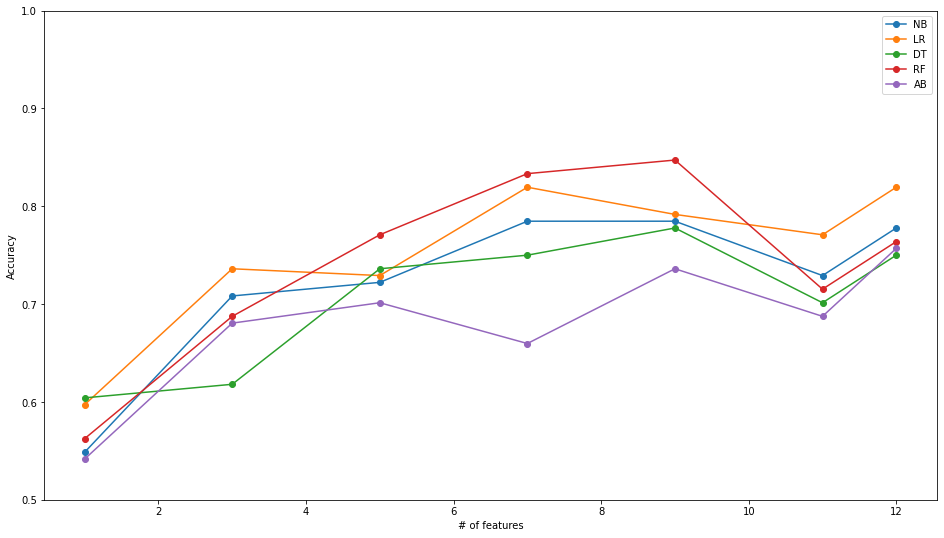

In [35]:
from collections import defaultdict

# num_feats = []
accuracy_scores = defaultdict(list)

for i in range(len(algorithms)):
    num_feats = []
    for col in fs.columns[i::len(algorithms)]:
        num_feats.append(fs[col]['k-features'])
        accuracy_scores[col.split('_')[2]].append(fs[col]['accuracy'])

plt.figure(figsize=(16,9))
for algo in algorithms:
    plt.plot(num_feats, accuracy_scores[algo], label=algo, marker='o')

plt.ylim((0.5, 1))
plt.xlabel('# of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Automatically determining the appropriate number of features

In [27]:
from sklearn.feature_selection import RFECV

scorers = {
    **{'precision_' + str(i): make_scorer(precision_score, average = None, labels = [i], zero_division=0) for i in range(3)},
    'precision_average': make_scorer(precision_score, average='macro', zero_division=0),
    **{'recall_' + str(i): make_scorer(recall_score, average = None, labels = [i], zero_division=0) for i in range(3)},
    'recall_average': make_scorer(recall_score, average='macro', zero_division=0),
    **{'f1_score_' + str(i): make_scorer(f1_score, average = None, labels = [i], zero_division=0) for i in range(3)},
    'f1_average': make_scorer(f1_score, average='macro'),
    'accuracy': make_scorer(accuracy_score)
}

rfe_average_scores = {}
algorithms_copy = dict(algorithms)
algorithms_copy.pop('NB')
for name, algo in algorithms_copy.items():
    selector = RFECV(algo)
    X_new = selector.fit_transform(X, y)
    res = cross_validate(algo, X, y, cv=10, scoring=scorers, n_jobs=-1)
    res = {k: v.mean() for k, v in res.items()}
    labels = list(range(3))
    res_df_dict = {'label': labels, 'precision': [res['test_precision_' + str(i)] for i in labels], 'recall': [res['test_recall_' + str(i)] for i in labels], 'f1_score': [res['test_f1_score_' + str(i)] for i in labels]}
    res_df = pd.DataFrame(res_df_dict)
    print('\n\n', algo, '\n\n')
    print(res_df)
    print('\nAccuracy:', res['test_accuracy'])
    print('Average Precision:', res['test_precision_average'])
    print('Average Recall:', res['test_recall_average'])
    print('Average F1-scoree:', res['test_f1_average'])
    rfe_average_scores['CV_' + name] = {'accuracy': res['test_accuracy'], 'precision': res['test_precision_average'], 'recall': res['test_recall_average'], 'f1-score': res['test_f1_average'], 'k': selector.n_features_}
rfe_avg_scores = pd.DataFrame(rfe_average_scores).transpose()



 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 


   label  precision    recall  f1_score
0      0   0.861235  0.858974  0.851125
1      1   0.718396  0.730087  0.720946
2      2   0.745070  0.689524  0.706092

Accuracy: 0.7520833333333333
Average Precision: 0.7749000848366174
Average Recall: 0.7595282495282495
Average F1-scoree: 0.7593877745313632


 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',

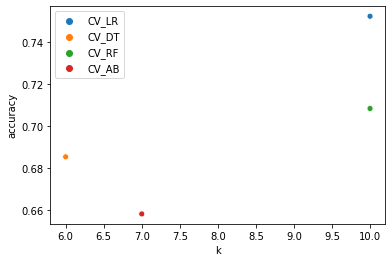

In [28]:
sns.scatterplot(x=rfe_avg_scores['k'], y=rfe_avg_scores['accuracy'], hue=rfe_avg_scores.index)

In [29]:
cv_avg_scores

,accuracy,precision,recall,f1-score
CV_NB,0.725000,0.744935,0.750380,0.735391
CV_LR,0.752083,0.774900,0.759528,0.759388
CV_DT,0.693750,0.714273,0.692290,0.692419
CV_RF,0.702083,0.739107,0.705865,0.705074
CV_AB,0.658333,0.686707,0.674681,0.666572


In [56]:
fs

,FS_1_NB,FS_1_LR,FS_1_DT,FS_1_RF,FS_1_AB,FS_3_NB,FS_3_LR,FS_3_DT,FS_3_RF,FS_3_AB,FS_5_NB,FS_5_LR,FS_5_DT,FS_5_RF,FS_5_AB,FS_7_NB,FS_7_LR,FS_7_DT,FS_7_RF,FS_7_AB,FS_9_NB,FS_9_LR,FS_9_DT,FS_9_RF,FS_9_AB,FS_11_NB,FS_11_LR,FS_11_DT,FS_11_RF,FS_11_AB,FS_12_NB,FS_12_LR,FS_12_DT,FS_12_RF,FS_12_AB
k-features,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,11.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000
accuracy,0.548611,0.597222,0.604167,0.562500,0.541667,0.708333,0.736111,0.618056,0.687500,0.680556,0.722222,0.729167,0.736111,0.770833,0.701389,0.784722,0.819444,0.750000,0.833333,0.659722,0.784722,0.791667,0.777778,0.847222,0.736111,0.729167,0.770833,0.701389,0.715278,0.687500,0.777778,0.819444,0.750000,0.763889,0.756944
precision,0.576319,0.589755,0.598481,0.569670,0.426628,0.715223,0.728146,0.637644,0.681115,0.687350,0.735338,0.731221,0.747649,0.800253,0.708312,0.796351,0.817211,0.751780,0.834464,0.662005,0.789502,0.804136,0.809995,0.852948,0.745882,0.727579,0.793123,0.735480,0.753377,0.697273,0.784469,0.837825,0.750909,0.779487,0.766246
recall,0.619270,0.612665,0.610723,0.597902,0.505828,0.765240,0.774550,0.644369,0.726652,0.728078,0.768744,0.746178,0.759876,0.755204,0.731642,0.825115,0.835186,0.765470,0.839826,0.684204,0.810132,0.800816,0.779631,0.857539,0.754649,0.747883,0.765835,0.690924,0.706428,0.694460,0.798336,0.820762,0.767754,0.768173,0.779494
f1-score,0.544735,0.595628,0.593680,0.572857,0.448149,0.721152,0.743822,0.611791,0.697628,0.696487,0.734883,0.737785,0.748720,0.765170,0.713912,0.788098,0.823627,0.756684,0.836895,0.667495,0.791908,0.801398,0.789683,0.854910,0.743693,0.731699,0.769940,0.696372,0.714394,0.695815,0.783333,0.826404,0.756337,0.772049,0.766316


In [36]:
rfe_avg_scores

,accuracy,precision,recall,f1-score,k
CV_LR,0.752083,0.774900,0.759528,0.759388,10.0
CV_DT,0.685417,0.703714,0.683560,0.684612,6.0
CV_RF,0.708333,0.743710,0.712897,0.710712,10.0
CV_AB,0.658333,0.686707,0.674681,0.666572,7.0


In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
clf = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31 10  0]
 [12 46  6]
 [ 0  6 33]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        41
           1       0.74      0.72      0.73        64
           2       0.85      0.85      0.85        39

    accuracy                           0.76       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.76      0.76      0.76       144

